In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = [12, 6]

In [12]:
try:
    df = pd.read_csv('portfolio_daily_tracking.csv')
    df['date'] = pd.to_datetime(df['date'])
    df = df.sort_values('date')
    df_trend = pd.read_csv('portfolio_results.csv')
    df_trend['date'] = pd.to_datetime(df['date'])
    df_trend = df_trend.sort_values('date')
    print("Data loaded successfully!")
except FileNotFoundError:
    print("File not found. Please ensure the CSV is in the same directory.")

Data loaded successfully!


ValueError: x and y must have same first dimension, but have shapes (1144,) and (1798,)

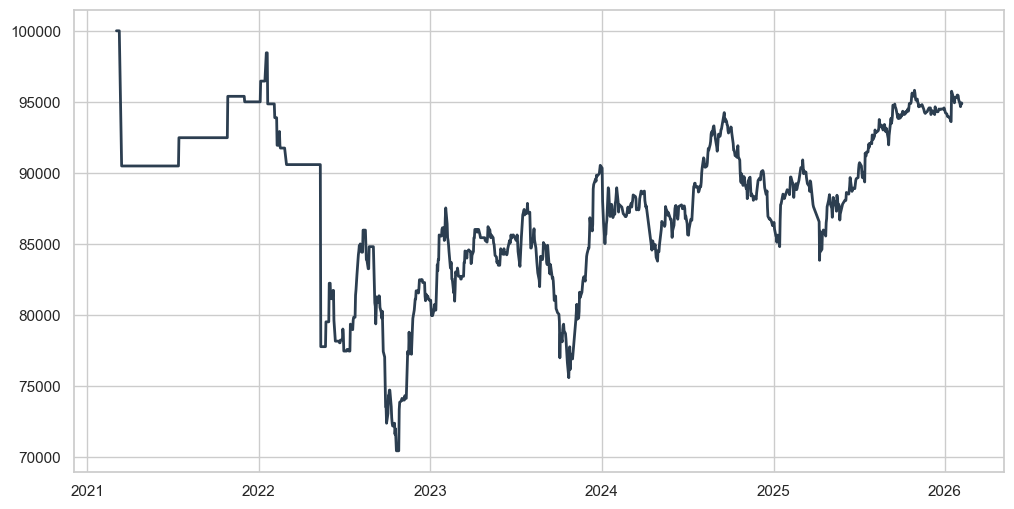

In [13]:
fig, ax1 = plt.subplots()

# Plotting the two strategies
ax1.plot(df['date'], df['bond_market_value']+df['coupons_received_usd'], label='INDON45 + coupons', 
         color='#2c3e50', linewidth=2, linestyle='-')

ax1.plot(df['date'], df['bond_market_value']+df_trend['Total_Value'], label='INDON45 + coupons -> BTC Portfolio', 
         color='#f39c12', linewidth=2.5, linestyle='--')

# Formatting labels and titles
ax1.set_title('Investment Strategy Comparison', fontsize=16, pad=20)
ax1.set_xlabel('Date', fontsize=12)
ax1.set_ylabel('Portfolio Value (USD)', fontsize=12)
ax1.legend(loc='upper left', frameon=True)

# Formatting the Y-axis to show dollar signs
from matplotlib.ticker import StrMethodFormatter
ax1.yaxis.set_major_formatter(StrMethodFormatter('${x:,.0f}'))

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter

try:
    # 1. Load and clean first dataframe
    df = pd.read_csv('portfolio_daily_tracking.csv')
    df['date'] = pd.to_datetime(df['date'])
    
    # 2. Load and clean second dataframe
    df_trend = pd.read_csv('portfolio_result.csv') # Fixed filename from your snippet
    df_trend['date'] = pd.to_datetime(df_trend['date'])
    
    # 3. Merge dataframes on 'date' to ensure equal dimensions
    # 'inner' join keeps only dates present in both files
    df_merged = pd.merge(df, df_trend, on='date', how='inner').sort_values('date')
    
    print(f"Data merged successfully! Rows: {len(df_merged)}")

    # 4. Plotting
    fig, ax1 = plt.subplots(figsize=(12, 6))

    # Strategy 1
    ax1.plot(df_merged['date'], 
             df_merged['bond_market_value'] + df_merged['coupons_received_usd'], 
             label='INDON45 + coupons', 
             color='#2c3e50', linewidth=2)

    # Strategy 2 (Now using the merged columns)
    ax1.plot(df_merged['date'], 
             df_merged['bond_market_value'] + df_merged['Total_Value'], 
             label='INDON45 + coupons -> BTC Portfolio', 
             color='#f39c12', linewidth=2.5, linestyle='--')

    # Formatting
    ax1.set_title('Investment Strategy Comparison', fontsize=16, pad=20)
    ax1.set_xlabel('Date', fontsize=12)
    ax1.set_ylabel('Portfolio Value (USD)', fontsize=12)
    ax1.yaxis.set_major_formatter(StrMethodFormatter('${x:,.0f}'))
    
    plt.xticks(rotation=45)
    ax1.legend(loc='upper left', frameon=True)
    plt.tight_layout()
    plt.show()

except FileNotFoundError:
    print("File not found. Please check filenames.")
except Exception as e:
    print(f"An error occurred: {e}")

File not found. Please check filenames.
